## <center><br />CUSTOMER ANALYSIS FOR RETAIL <hr /></center>
### ANALYTICS IN RETAIL:
With the retail market getting more and more competitive by the day, there has never been
anything more important than the ability for optimizing service business processes when
trying to satisfy the expectations of customers. Channelizing and managing data with the
aim of working in favor of the customer as well as generating profits is very significant for
survival.<br /><br />
Ideally, a retailer’s customer data reflects the company’s success in reaching and nurturing
its customers. Retailers built reports summarizing customer behavior using metrics such as
conversion rate, average order value, recency of purchase and total amount spent in recent
transactions. These measurements provided general insight into the behavioral tendencies
of customers.<br /><br />
Customer intelligence is the practice of determining and delivering data-driven insights into
past and predicted future customer behavior.To be effective, customer intelligence must
combine raw transactional and behavioral data to generate derived measures.<br /><br />
In a nutshell, for big retail players all over the world, data analytics is applied more these
days at all stages of the retail process – taking track of popular products that are emerging,
doing forecasts of sales and future demand via predictive simulation, optimizing placements
of products and offers through heat-mapping of customers and many others.<br /><br />
DATA AVAILABILITY:<br />
- Retail Data.xlsx<br />
o This book has three sheets (Customer, Transaction, Product Heirarchy)<br />
o Customer: Customers information including demographics<br />
o Transaction: Transactions of customers<br />
o Product Heirarchy: Product information (cateogry, sub category etc...)<br /><br />
<b>BUSINESS PROBLEM:</b><br />
A Retail store is required to analyze the day-to-day transactions and keep a track of its customers
spread across various locations along with their purchases/returns across various categories.

In [1]:
# Let's import the needed libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Now, let's import given 3 levels of retail data
cust = pd.read_csv('Customer.csv') # A dataframe having customer demographics data
prod = pd.read_csv('prod_cat_info.csv') # A data frame having category information about the products
trx = pd.read_csv('Transactions.csv') # A dataframe having transaction level data

### Exploratory Analysis
#### 1 - Customer Demographics

In [3]:
cust.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
cust.dtypes

customer_Id      int64
DOB             object
Gender          object
city_code      float64
dtype: object

In [5]:
# Let us convert the date of birth column from 'object' data type to proper datetime format so that it is easier
# to perform datetime manipulations/operations
cust['Date Of Birth'] = pd.to_datetime(cust['DOB'], format="%d-%m-%Y")
cust = cust.drop('DOB', axis=1)
# Also let's rename the columns for better readability
cust.rename({'customer_Id':'Customer ID', 'city_code':'City Code'}, axis=1, inplace=True)

In [6]:
cust.head()

,Customer ID,Gender,City Code,Date Of Birth
0,268408,M,4.0,1970-01-02
1,269696,F,8.0,1970-01-07
2,268159,F,8.0,1970-01-08
3,270181,F,2.0,1970-01-10
4,268073,M,1.0,1970-01-11


In [7]:
cust.dtypes

Customer ID               int64
Gender                   object
City Code               float64
Date Of Birth    datetime64[ns]
dtype: object

In [8]:
# Let's check for any duplicate customer tuples
cust[cust['Customer ID'].duplicated()]
# All customers are unique

,Customer ID,Gender,City Code,Date Of Birth


In [9]:
# Let's check what is the proportion of Males and Females in our data -> just for balancing purposes in future manipulations
print("Percentage of Males = {}{}".format((cust[cust.Gender=='M'].shape[0]/cust.shape[0]) * 100, "%"))
print("Percentage of Males = {}{}".format((cust[cust.Gender=='F'].shape[0]/cust.shape[0]) * 100, "%"))

Percentage of Males = 51.21303346909863%
Percentage of Males = 48.751549495307245%


- Males : Female proportion seems little bit balanced, we'll see later if any sampling or shuffling is needed later on

#### 2 - Product Category Information

In [10]:
prod.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [11]:
prod.isnull()
# No missing data

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [12]:
# Let us rename the columns
prod.rename({'prod_cat_code':'Product Category Code', 'prod_cat':'Product Category',
             'prod_sub_cat_code':'Product Sub-Category Code', 'prod_subcat':'Product Sub-Category'}, axis=1)
# From below we have a total of 6 major categories of products

,Product Category Code,Product Category,Product Sub-Category Code,Product Sub-Category
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


#### 3 - Transactional Data

In [13]:
trx.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [14]:
# Let's rename the columns
trx.rename({'transaction_id':'Transaction ID', 'cust_id':'Customer ID', 'tran_date':'Transaction Date',
            'prod_subcat_code':'Product Sub-Category Code', 'prod_cat_code':'Product Category Code',
            'total_amt':'Total Amount'}, axis=1, inplace=True)
trx.head()

,Transaction ID,Customer ID,Transaction Date,Product Sub-Category Code,Product Category Code,Qty,Rate,Tax,Total Amount,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [15]:
# Check for any missing data
print(trx[pd.isnull(trx['Transaction ID'])])
print(trx[pd.isnull(trx['Customer ID'])])
print(trx[pd.isnull(trx['Transaction Date'])])
print(trx[pd.isnull(trx['Product Sub-Category Code'])])
print(trx[pd.isnull(trx['Product Category Code'])])
print(trx[pd.isnull(trx['Qty'])])
print(trx[pd.isnull(trx['Rate'])])
print(trx[pd.isnull(trx['Tax'])])
print(trx[pd.isnull(trx['Total Amount'])])
print(trx[pd.isnull(trx['Store_type'])])
# From below, there is no missing data in transaction dataframe

Empty DataFrame
Columns: [Transaction ID, Customer ID, Transaction Date, Product Sub-Category Code, Product Category Code, Qty, Rate, Tax, Total Amount, Store_type]
Index: []
Empty DataFrame
Columns: [Transaction ID, Customer ID, Transaction Date, Product Sub-Category Code, Product Category Code, Qty, Rate, Tax, Total Amount, Store_type]
Index: []
Empty DataFrame
Columns: [Transaction ID, Customer ID, Transaction Date, Product Sub-Category Code, Product Category Code, Qty, Rate, Tax, Total Amount, Store_type]
Index: []
Empty DataFrame
Columns: [Transaction ID, Customer ID, Transaction Date, Product Sub-Category Code, Product Category Code, Qty, Rate, Tax, Total Amount, Store_type]
Index: []
Empty DataFrame
Columns: [Transaction ID, Customer ID, Transaction Date, Product Sub-Category Code, Product Category Code, Qty, Rate, Tax, Total Amount, Store_type]
Index: []
Empty DataFrame
Columns: [Transaction ID, Customer ID, Transaction Date, Product Sub-Category Code, Product Category Code, Qt

In [16]:
# Let's check the datatypes
trx.dtypes

Transaction ID                 int64
Customer ID                    int64
Transaction Date              object
Product Sub-Category Code      int64
Product Category Code          int64
Qty                            int64
Rate                           int64
Tax                          float64
Total Amount                 float64
Store_type                    object
dtype: object

In [17]:
# Since the transaction date is 'object' type, let's convert that too into pandas datetime64 type for easy manipulations

# From initial look at the data we see that some entries in transaction date are of the format %d-%m-%Y and some are of
# type %d/%m/%Y. So let's convert these to %d-%m-%Y format first
trx['Transaction Date'] = trx['Transaction Date'].str.replace(pat='/', repl='-')

# Now convert object to datetime64
trx['Transaction Date'] = pd.to_datetime(trx['Transaction Date'], format="%d-%m-%Y")
trx.head()

,Transaction ID,Customer ID,Transaction Date,Product Sub-Category Code,Product Category Code,Qty,Rate,Tax,Total Amount,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop


In [18]:
trx

,Transaction ID,Customer ID,Transaction Date,Product Sub-Category Code,Product Category Code,Qty,Rate,Tax,Total Amount,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop


In [19]:
cust

,Customer ID,Gender,City Code,Date Of Birth
0,268408,M,4.0,1970-01-02
1,269696,F,8.0,1970-01-07
2,268159,F,8.0,1970-01-08
3,270181,F,2.0,1970-01-10
4,268073,M,1.0,1970-01-11
...,...,...,...,...
5642,274474,M,2.0,1992-12-19
5643,267666,M,6.0,1992-12-24
5644,270476,F,3.0,1992-12-25
5645,269626,F,5.0,1992-12-27


In [20]:
prod

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


#### 1) Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [21]:
# Since the dataframe transactions(trx) has the most number of fields and most data, I will combine the details
# into it and create customer_final out of it
cust_final = trx.copy()
cust_final['Date of Birth'] = ""
cust_final['Product Category'] = ""
cust_final['Product Sub-Category'] = ""
cust_final['Gender'] = ""
cust_final['City Code'] = ""

# First merge customer demographics into cust_final
for (x,y,z,w) in zip(cust['Date Of Birth'], cust['Gender'], cust['City Code'], cust['Customer ID']):
    cust_final.loc[cust_final['Customer ID']== w, 'Date of Birth'] = x
    cust_final.loc[cust_final['Customer ID']== w, 'Gender'] = y
    cust_final.loc[cust_final['Customer ID']== w, 'City Code'] = z
    
# Secondly, merge the product related information now
for (x,y,z,w) in zip(prod['prod_cat_code'], prod['prod_sub_cat_code'], prod['prod_cat'], prod['prod_subcat']):
    cust_final.loc[cust_final['Product Category Code']== x, 'Product Category'] = z
    cust_final.loc[cust_final['Product Sub-Category Code']== y, 'Product Sub-Category'] = w

In [22]:
# Merged dataset
cust_final

,Transaction ID,Customer ID,Transaction Date,Product Sub-Category Code,Product Category Code,Qty,Rate,Tax,Total Amount,Store_type,Date of Birth,Product Category,Product Sub-Category,Gender,City Code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26 00:00:00,Clothing,Mens,M,5
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11 00:00:00,Electronics,Computers,F,8
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27 00:00:00,Books,DIY,M,8
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-06-08 00:00:00,Home and kitchen,Bath,M,3
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27 00:00:00,Books,DIY,M,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21 00:00:00,Books,Tools,M,7
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27 00:00:00,Clothing,Women,M,9
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20 00:00:00,Home and kitchen,Furnishing,M,8
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22 00:00:00,Books,Bath,M,2


#### 2a) Get the column names and their corresponding data types

In [23]:
cust_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Transaction ID             23053 non-null  int64         
 1   Customer ID                23053 non-null  int64         
 2   Transaction Date           23053 non-null  datetime64[ns]
 3   Product Sub-Category Code  23053 non-null  int64         
 4   Product Category Code      23053 non-null  int64         
 5   Qty                        23053 non-null  int64         
 6   Rate                       23053 non-null  int64         
 7   Tax                        23053 non-null  float64       
 8   Total Amount               23053 non-null  float64       
 9   Store_type                 23053 non-null  object        
 10  Date of Birth              23053 non-null  object        
 11  Product Category           23053 non-null  object        
 12  Prod

#### 2b) Top/Bottom 10 observations

In [24]:
# Top 10 observations
cust_final.head(10)

,Transaction ID,Customer ID,Transaction Date,Product Sub-Category Code,Product Category Code,Qty,Rate,Tax,Total Amount,Store_type,Date of Birth,Product Category,Product Sub-Category,Gender,City Code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26 00:00:00,Clothing,Mens,M,5
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11 00:00:00,Electronics,Computers,F,8
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27 00:00:00,Books,DIY,M,8
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-06-08 00:00:00,Home and kitchen,Bath,M,3
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27 00:00:00,Books,DIY,M,8
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,1982-10-09 00:00:00,Electronics,Personal Appliances,F,6
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,1981-05-29 00:00:00,Home and kitchen,Bath,M,9
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,1971-04-21 00:00:00,Home and kitchen,Tools,M,9
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,1971-11-04 00:00:00,Clothing,Comics,F,8
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,1979-11-27 00:00:00,Electronics,Personal Appliances,F,3


In [25]:
# Bottom 10 observations
cust_final.tail(10)

,Transaction ID,Customer ID,Transaction Date,Product Sub-Category Code,Product Category Code,Qty,Rate,Tax,Total Amount,Store_type,Date of Birth,Product Category,Product Sub-Category,Gender,City Code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,1976-08-10 00:00:00,Books,Kitchen,M,8
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,1991-10-12 00:00:00,Electronics,Women,M,4
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,1980-01-17 00:00:00,Books,DIY,F,8
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,1975-06-28 00:00:00,Home and kitchen,Bath,F,6
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,1974-04-18 00:00:00,Footwear,Women,M,4
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21 00:00:00,Books,Tools,M,7
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27 00:00:00,Clothing,Women,M,9
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20 00:00:00,Home and kitchen,Furnishing,M,8
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22 00:00:00,Books,Bath,M,2
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,1982-01-15 00:00:00,Books,Bath,M,1


#### 2c) “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [26]:
# Logically speaking the needed five-number summary only suits well to Variables like Quantity, Rate, Tax and Total Amount
# Various codes such as city code and various category codes are best to categorical treatment
def fiveNumSummary(x):
    return pd.Series({'Min':x.min(), 'Q1':x.quantile(0.25), 'Median':x.median(), 'Q3':x.quantile(0.75), 'Max':x.max()})

cust_final[['Transaction ID', 'Customer ID', 'Qty', 'Rate', 'Tax', 'Total Amount']].apply(fiveNumSummary).T

,Min,Q1,Median,Q3,Max
Transaction ID,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
Customer ID,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
Qty,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
Total Amount,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03


#### 2d) Frequency tables for all the categorical variables

In [27]:
def freqValues(X):
    return(cust_final.groupby(by=[X])[[X]].count().rename({X:"Frequency"}, axis=1))

for _ in cust_final.columns.difference(['Transaction ID', 'Customer ID', 'Qty', 'Rate', 'Tax', 'Total Amount']):
    print(freqValues(_))


           Frequency
City Code           
1.0             2258
2.0             2270
3.0             2411
4.0             2422
5.0             2360
6.0             2127
7.0             2356
8.0             2330
9.0             2178
10.0            2333
               Frequency
Date of Birth           
1970-01-02            11
1970-01-07             3
1970-01-08             6
1970-01-10            10
1970-01-11             3
...                  ...
1992-12-19             3
1992-12-24             5
1992-12-25             5
1992-12-27             2
1992-12-29             3

[3987 rows x 1 columns]
        Frequency
Gender           
F           11233
M           11811
                  Frequency
Product Category           
Bags                   1998
Books                  6069
Clothing               2960
Electronics            4898
Footwear               2999
Home and kitchen       4129
                       Frequency
Product Category Code           
1                           2960
2  

#### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

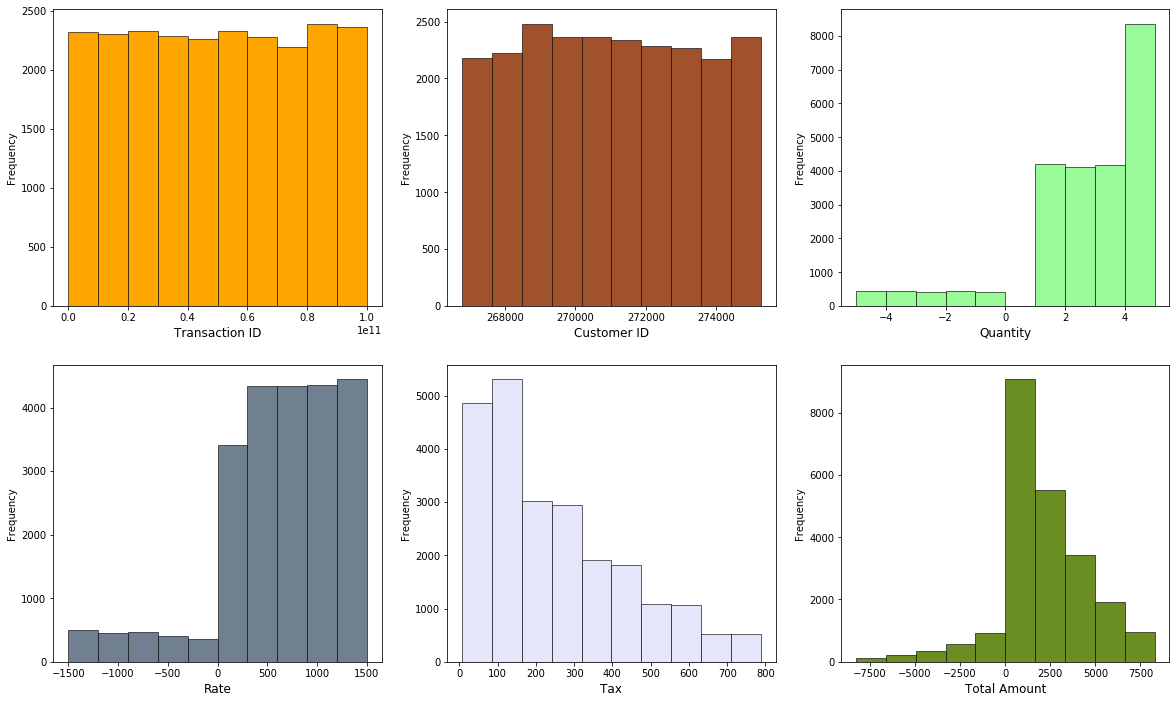

In [28]:
# Histogram For Continous Variables
# Method 1: Using Pandas Plot (without binning/bucketing)
fig, ax = plt.subplots(2, 3, sharex=False, sharey=False)
cust_final['Transaction ID'].plot(kind='hist', ax=ax[0][0], color='orange', edgecolor='black', linewidth=0.6)
ax[0][0].set_xlabel('Transaction ID', size=12)
cust_final['Customer ID'].plot(kind='hist', ax=ax[0][1], color='sienna', edgecolor='black', linewidth=0.6)
ax[0][1].set_xlabel('Customer ID', size=12)
cust_final['Qty'].plot(kind='hist', ax=ax[0][2], color='palegreen', edgecolor='black', linewidth=0.6)
ax[0][2].set_xlabel('Quantity', size=12)
cust_final['Rate'].plot(kind='hist', ax=ax[1][0], color='slategray', edgecolor='black', linewidth=0.6)
ax[1][0].set_xlabel('Rate', size=12)
cust_final['Tax'].plot(kind='hist', ax=ax[1][1], color='lavender', edgecolor='black', linewidth=0.6)
ax[1][1].set_xlabel('Tax', size=12)
cust_final['Total Amount'].plot(kind='hist', ax=ax[1][2], color='olivedrab', edgecolor='black', linewidth=0.6)
ax[1][2].set_xlabel('Total Amount', size=12)
fig.set_size_inches(20,12)
# Double Click on the figure below to zoom in

RangeIndex(start=0, stop=23053, step=1)


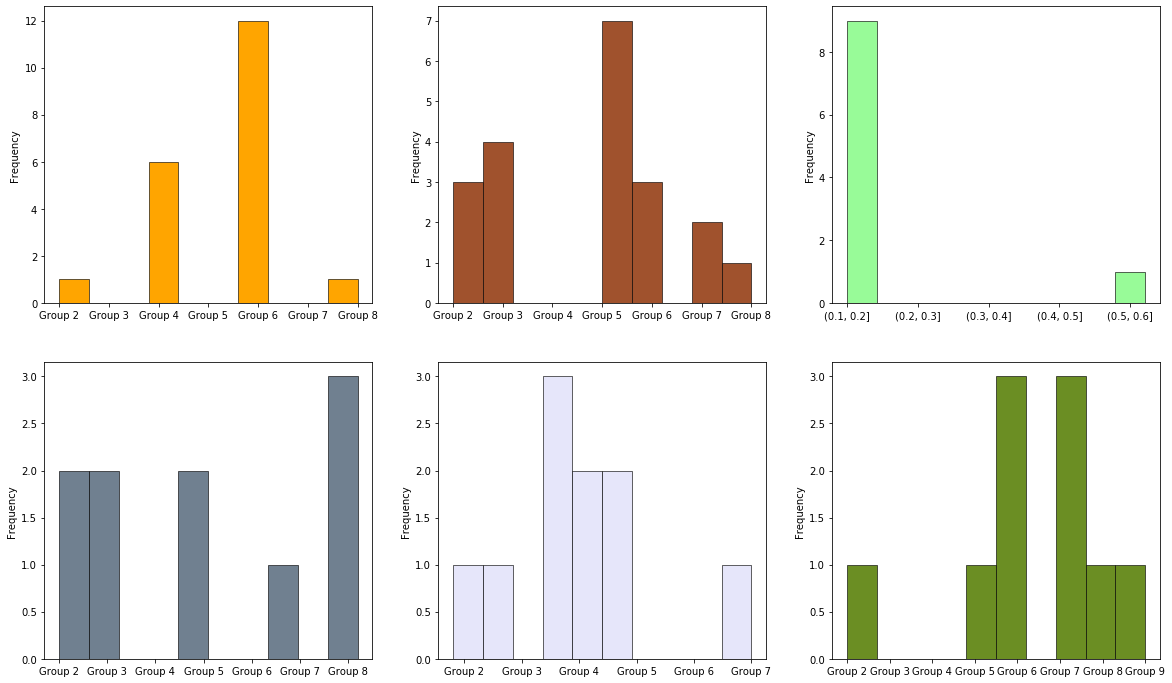

In [29]:
# Method 2: Using qcut function to bucket the categories
fig, ax = plt.subplots(2, 3, sharex=False, sharey=False)

# Transaction ID
trx_groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6', 'Group 7', 'Group 8',
         'Group 9', 'Group 10', 'Group 11', 'Group 12', 'Group 13', 'Group 14', 'Group 15', 'Group 16', 'Group 17', 'Group 18',
         'Group 19', 'Group 20']
cust_final['quant_Transaction ID'] = pd.qcut(cust_final['Transaction ID'], q=20, labels=trx_groups)
cust_final['quant_Transaction ID'].value_counts(sort=False).plot(kind='hist', rot=0, color="orange", ax=ax[0][0], edgecolor='black', linewidth=0.6)
ax[0][0].set_xticklabels(cust_final['quant_Transaction ID'].cat.categories)

# Customer ID
cid_groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6', 'Group 7', 'Group 8',
         'Group 9', 'Group 10', 'Group 11', 'Group 12', 'Group 13', 'Group 14', 'Group 15', 'Group 16', 'Group 17', 'Group 18',
         'Group 19', 'Group 20']
cust_final['quant_Customer ID'] = pd.qcut(cust_final['Customer ID'], q=20, labels=cid_groups)
cust_final['quant_Customer ID'].value_counts(sort=False).plot(kind='hist', rot=0, color="sienna", ax=ax[0][1], edgecolor='black', linewidth=0.6)
ax[0][1].set_xticklabels(cust_final['quant_Customer ID'].cat.categories)

# Qty
qty_groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
cust_final['quant_Qty'] = pd.cut(cust_final['Qty'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], duplicates='drop')
print(cust_final['quant_Qty'].keys())
cust_final['quant_Qty'].value_counts(sort=False).plot(kind='hist', rot=0, color="palegreen", ax=ax[0][2], edgecolor='black', linewidth=0.6)
ax[0][2].set_xticklabels(cust_final['quant_Qty'].cat.categories)

# Rate
rate_groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6', 'Group 7', 'Group 8',
         'Group 9', 'Group 10']
cust_final['quant_Rate'] = pd.qcut(cust_final['Rate'], q=10, labels=rate_groups)
cust_final['quant_Rate'].value_counts(sort=False).plot(kind='hist', rot=0, color="slategray", ax=ax[1][0], edgecolor='black', linewidth=0.6)
ax[1][0].set_xticklabels(cust_final['quant_Rate'].cat.categories)

# Tax
tax_groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6', 'Group 7', 'Group 8',
         'Group 9', 'Group 10']
cust_final['quant_Tax'] = pd.qcut(cust_final['Tax'], q=10, labels=tax_groups)
cust_final['quant_Tax'].value_counts(sort=False).plot(kind='hist', rot=0, color="lavender", ax=ax[1][1], edgecolor='black', linewidth=0.6)
ax[1][1].set_xticklabels(cust_final['quant_Tax'].cat.categories)

# Total Amount
tot_groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6', 'Group 7', 'Group 8',
         'Group 9', 'Group 10']
cust_final['quant_Total Amount'] = pd.qcut(cust_final['Total Amount'], q=10, labels=tot_groups)
cust_final['quant_Total Amount'].value_counts(sort=False).plot(kind='hist', rot=0, color="olivedrab", ax=ax[1][2], edgecolor='black', linewidth=0.6)
ax[1][2].set_xticklabels(cust_final['quant_Total Amount'].cat.categories)


fig.set_size_inches(20,12)
plt.show()

Frequency bars for Categorical Variables

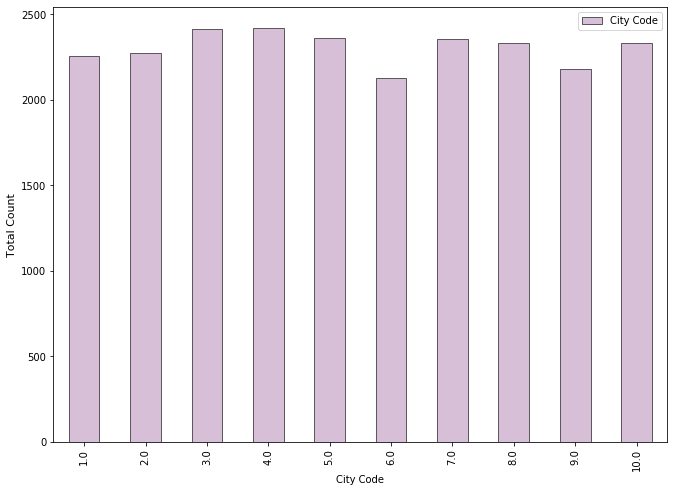

In [30]:
# CITY CODE
fig, ax = plt.subplots(1,1)
cust_final.groupby(['City Code'])[['City Code']].count().plot(kind='bar', color='thistle', edgecolor='black', linewidth=0.6, ax=ax)
ax.set_ylabel('Total Count', fontsize=11)
fig.set_size_inches(11, 8)

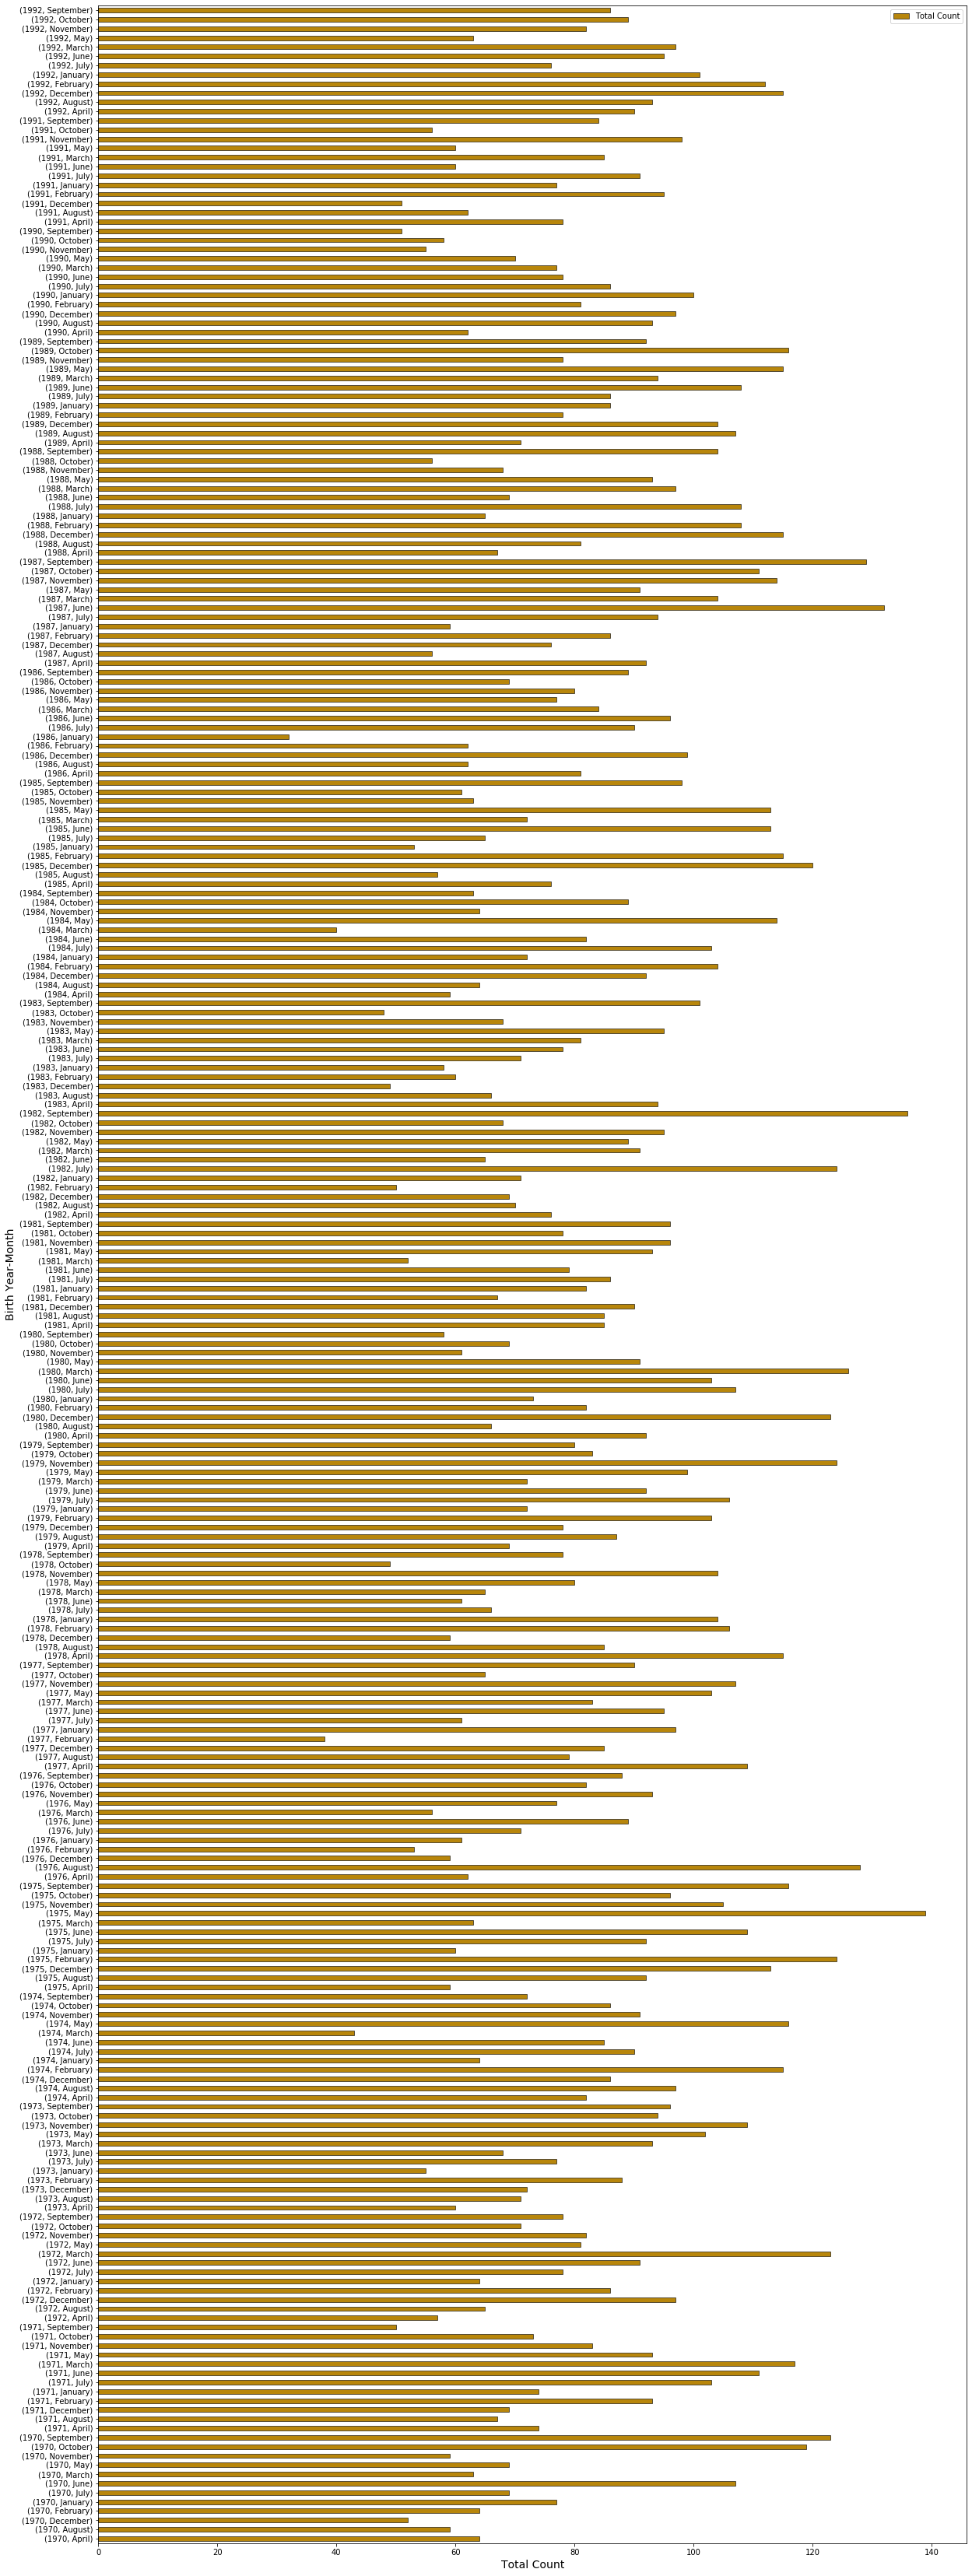

In [31]:
# DATE OF BIRTH
# For Year-Month Analysis, we need to segregate the Dates yearly and monthly
cust_final['Birth Year'] = cust_final['Date of Birth'].dt.strftime('%Y')
cust_final['Birth Month'] = cust_final['Date of Birth'].dt.month_name()
fig, ax = plt.subplots(1,1)
cust_final.groupby(['Birth Year', 'Birth Month'])[['Birth Month']].count().rename({
    'Birth Month':'Total Count'}, axis=1).plot(kind='barh', color= 'darkgoldenrod',
                                               edgecolor='black', linewidth=0.6, ax=ax)
ax.set_ylabel('Birth Year-Month', fontsize=14)
ax.set_xlabel('Total Count', fontsize=14)
fig.set_size_inches(20, 60)

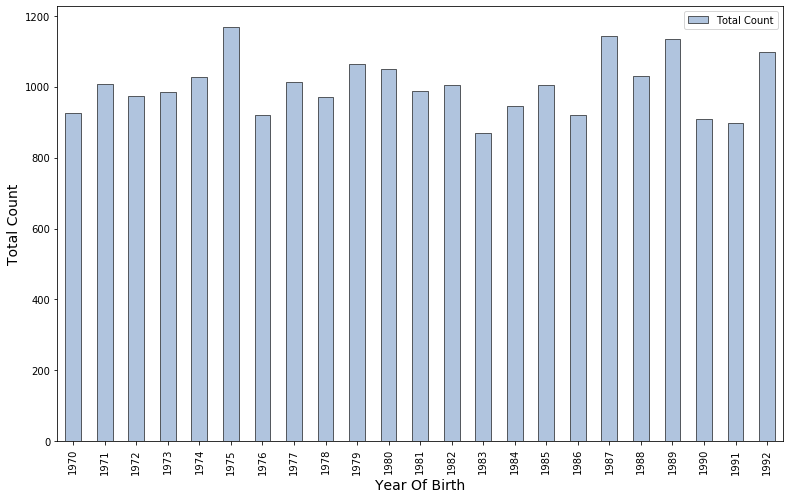

In [32]:
# For Yearly Analysis, we need to segregate the Dates yearly
# Number of people who are took birth from 1970-92
fig, ax = plt.subplots(1,1)
cust_final.groupby(['Birth Year'])[['Birth Year']].count().rename({'Birth Year':'Total Count'}, axis=1).plot(kind='bar', color= 'lightsteelblue', edgecolor='black', linewidth=0.6, ax=ax)
ax.set_ylabel('Total Count', fontsize=14)
ax.set_xlabel('Year Of Birth', fontsize=14)
fig.set_size_inches(13, 8)

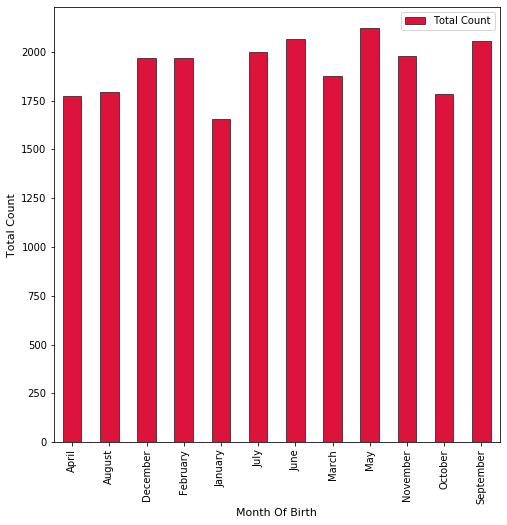

In [33]:
# For Monthly Analysis, we need to segregate the Dates monthly
# Number of people who are took birth from Jan-Dec in any of the year from 1970-92
fig, ax = plt.subplots(1,1)
cust_final.groupby(['Birth Month'])[['Birth Month']].count().rename({'Birth Month':'Total Count'}, axis=1).plot(kind='bar', color= 'crimson', edgecolor='black', linewidth=0.6, ax=ax)
ax.set_ylabel('Total Count', fontsize=11)
ax.set_xlabel('Month Of Birth', fontsize=11)
fig.set_size_inches(8, 8)

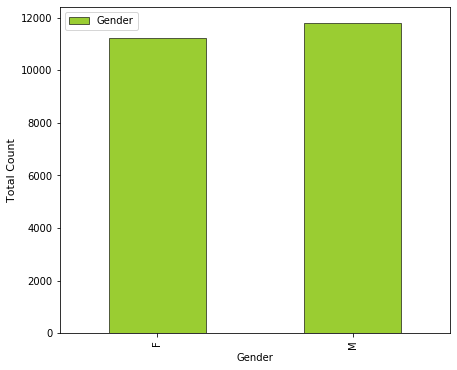

In [34]:
# GENDER
fig, ax = plt.subplots(1,1)
cust_final.groupby(['Gender'])[['Gender']].count().plot(kind='bar', color='yellowgreen', edgecolor='black', linewidth=0.6, ax=ax)
ax.set_ylabel('Total Count', fontsize=11)
fig.set_size_inches(7, 6)

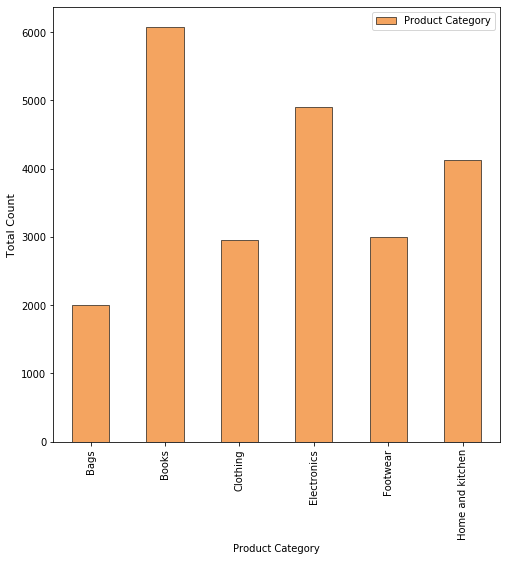

In [35]:
# PRODUCT CATEGORY
fig, ax = plt.subplots(1,1)
cust_final.groupby(['Product Category'])[['Product Category']].count().plot(kind='bar', color='sandybrown', edgecolor='black', linewidth=0.6, ax=ax)
ax.set_ylabel('Total Count', fontsize=11)
fig.set_size_inches(8, 8)

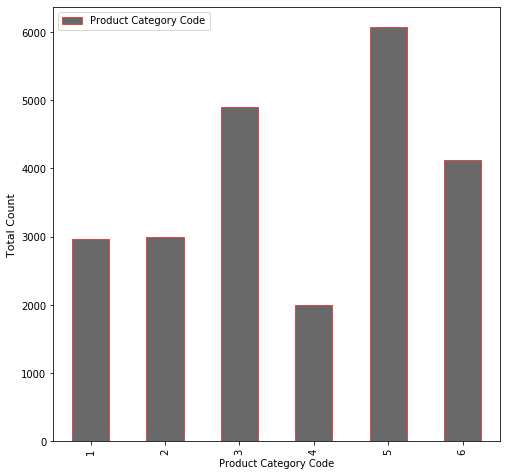

In [36]:
# PRODUCT CATEGORY CODE
fig, ax = plt.subplots(1,1)
cust_final.groupby(['Product Category Code'])[['Product Category Code']].count().plot(kind='bar', color='dimgray', edgecolor='red', linewidth=0.6, ax=ax)
ax.set_ylabel('Total Count', fontsize=11)
fig.set_size_inches(8, 8)

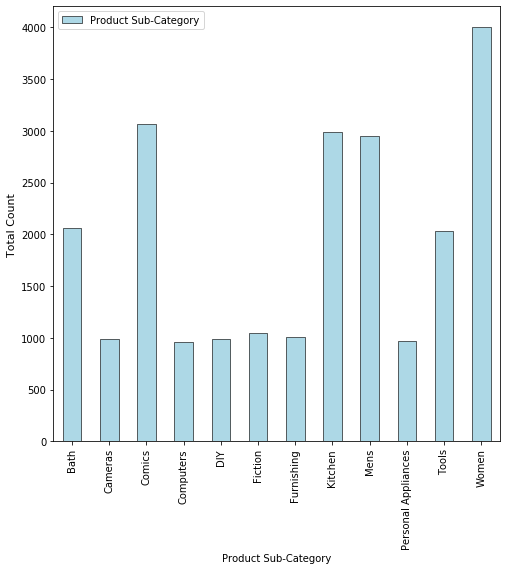

In [37]:
# PRODUCT SUB-CATEGORY CODE
fig, ax = plt.subplots(1,1)
cust_final.groupby(['Product Sub-Category'])[['Product Sub-Category']].count().plot(kind='bar', color='lightblue', edgecolor='black', linewidth=0.6, ax=ax)
ax.set_ylabel('Total Count', fontsize=11)
fig.set_size_inches(8, 8)

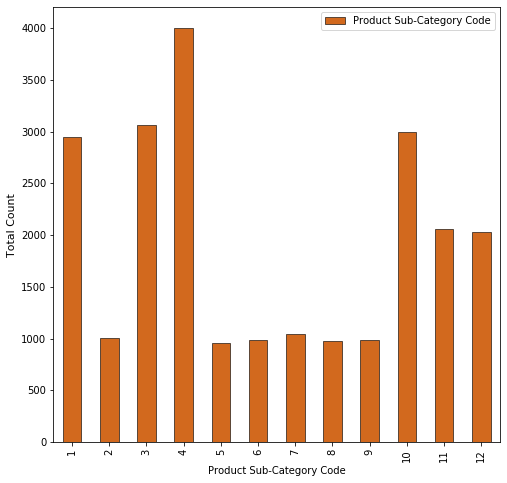

In [38]:
# PRODUCT CATEGORY CODE
fig, ax = plt.subplots(1,1)
cust_final.groupby(['Product Sub-Category Code'])[['Product Sub-Category Code']].count().plot(kind='bar', color='chocolate', edgecolor='black', linewidth=0.6, ax=ax)
ax.set_ylabel('Total Count', fontsize=11)
fig.set_size_inches(8, 8)

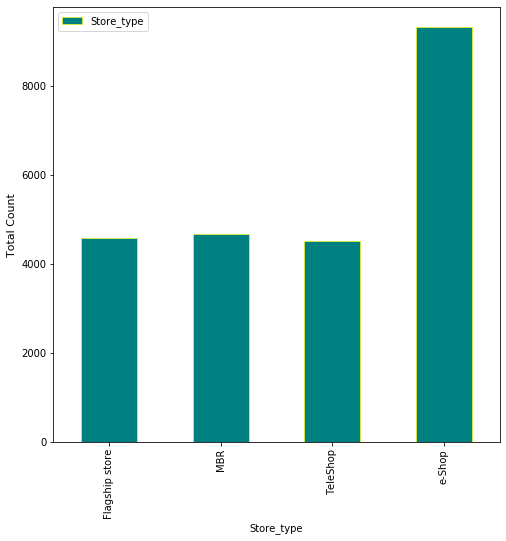

In [39]:
# STORE TYPE
fig, ax = plt.subplots(1,1)
cust_final.groupby(['Store_type'])[['Store_type']].count().plot(kind='bar', color='teal', edgecolor='yellow', linewidth=0.6, ax=ax)
ax.set_ylabel('Total Count', fontsize=11)
fig.set_size_inches(8, 8)

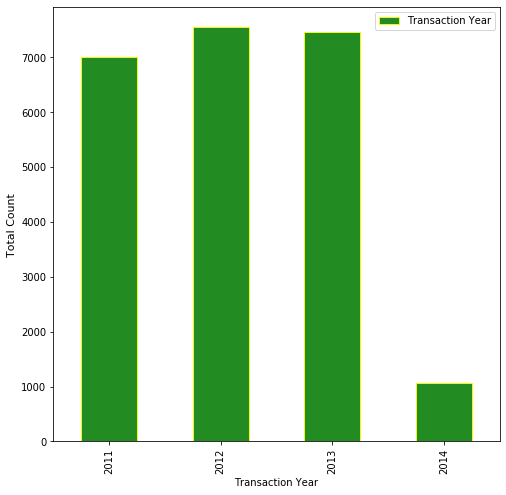

In [40]:
# TRANSACTION DATE
# Frequency of Transactions are done below as Yearly Transactions, Monthly Transactions and Year-Monthly Transactions
# This is done so because the data that we have is for the years 2014, 2013, 2012 and 2011
cust_final['Transaction Year'] = cust_final['Transaction Date'].dt.strftime('%Y')
cust_final['Transaction Month'] = cust_final['Transaction Date'].dt.month_name()

# Year-wise Transactions
fig, ax = plt.subplots(1,1)
cust_final.groupby(['Transaction Year'])[['Transaction Year']].count().plot(kind='bar', color='forestgreen', edgecolor='yellow', linewidth=0.9, ax=ax)
ax.set_ylabel('Total Count', fontsize=11)
fig.set_size_inches(8, 8)

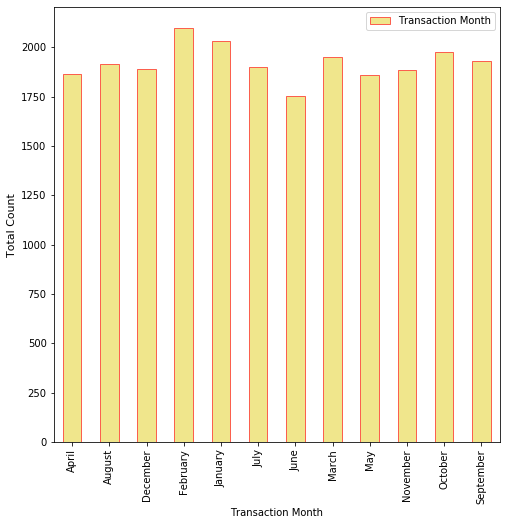

In [41]:
# Month-wise Transactions for all years 2011-14
fig, ax = plt.subplots(1,1)
cust_final.groupby(['Transaction Month'])[['Transaction Month']].count().plot(kind='bar', color='khaki', edgecolor='red', linewidth=0.6, ax=ax)
ax.set_ylabel('Total Count', fontsize=11)
fig.set_size_inches(8, 8)

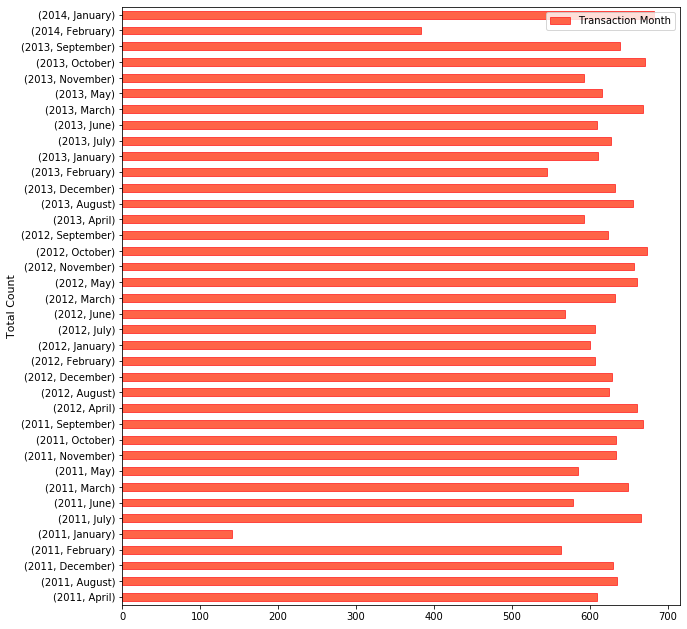

In [42]:
# Both Year and Month-wise Transactions
fig, ax = plt.subplots(1,1)
cust_final.groupby(['Transaction Year', 'Transaction Month'])[['Transaction Month']].count().plot(kind='barh', color='tomato', edgecolor='red', linewidth=0.6, ax=ax)
ax.set_ylabel('Total Count', fontsize=11)
fig.set_size_inches(10, 11)
# Highest Number of trsansactions happened in 2014 in the month of January !

#### 4. Calculate the following information using the merged dataset :
a- Time period of the available transaction data

In [43]:
# From the above visualizations itself it is pretty clear that we have Transactional Data of Years 2011 to 2104 (4 Year Data)

In [44]:
cust_final.drop(['quant_Transaction ID', 'quant_Customer ID', 'quant_Qty', 'quant_Rate',
       'quant_Tax', 'quant_Total Amount'], axis=1, inplace=True)

4b- Count of transactions where the total amount of transaction was negative

In [45]:
cust_final[cust_final['Total Amount']<0].shape[0]
# 2177 Transactions where the amount of transaction was negative

2177

#### 5. Analyze which product categories are more popular among females vs male customers.

In [46]:
cust_final[cust_final['Gender']=='M'].groupby(['Product Category',
                                               'Product Sub-Category'])[['Product Sub-Category']].count().rename(
            {'Product Sub-Category':'#Purchases'}, axis=1).sort_values("#Purchases", ascending=False)[0:5]  # Top 5

#Purchases
Product Category Product Sub-Category            
Electronics      Women                        562
Books            Fiction                      557
                 Bath                         553
Home and kitchen Tools                        552
Books            Comics                       546

In Males, following are the most popular product cat/sub-cat items :
     - Electronics -> Women (Most popular product seems to be the electronically operated tools meant for Women. These may include hair dryers, electronic face massagers etc)
    - Books -> Fiction and Bath
    - Home and kitchen -> Tools
    - Books -> Comics (Guys are nerdy anyway, that we all know)

In [47]:
cust_final[cust_final['Gender']=='F'].groupby(['Product Category',
                                               'Product Sub-Category'])[['Product Sub-Category']].count().rename(
            {'Product Sub-Category':'#Purchases'}, axis=1).sort_values("#Purchases", ascending=False)[0:5]  # Top 5

,,#Purchases
Product Category,Product Sub-Category,
Footwear,Comics,543
Clothing,Comics,525
Books,Tools,518
Home and kitchen,Tools,510
Bags,Women,510


In Females, following are the most popular product cat/sub-cat items :
    - Footwear -> Comics [Seems a lot of women like to buy footware related magazines, not surprised though]
    - Clothing -> Comics [Ofcourse :p]
    - Books -> Tools
    - Home and kitchen -> Tools
    - Bags ->Women

#### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [48]:
cust_city = cust.groupby(['City Code'])[['City Code']].count().rename({'City Code':'#Customers'}, axis=1).sort_values('#Customers', ascending=False)
# City Code 3 has the highest number of customers 
cust_city

,#Customers
City Code,
3.0,595
5.0,586
4.0,582
7.0,575
2.0,564
8.0,562
10.0,558
1.0,551
9.0,546


In [49]:
# %age of customers from City having city code = 3 :
print("Required Percentage = {}%".format(np.round(cust_city.reset_index()['#Customers'][0] / cust_city['#Customers'].sum() * 100, 2)))

Required Percentage = 10.54%


#### 7. Which store type sells the maximum products by value and by quantity?

In [50]:
# Store Type selling maximum products by value
cust_final.groupby(['Store_type'])[['Total Amount']].sum().sort_values('Total Amount', ascending=False)
# From below Story Type - "e-Shop" sells maximum products by value

,Total Amount
Store_type,
e-Shop,1.982482e+07
Flagship store,9.715688e+06
MBR,9.674486e+06
TeleShop,9.364781e+06


In [51]:
#Story Type seling maximum products by quantity
cust_final.groupby(['Store_type'])[['Qty']].sum().sort_values('Qty', ascending=False)
# From below Story Type - "e-Shop" sells maximum products by quantity also

,Qty
Store_type,
e-Shop,22763
MBR,11194
Flagship store,11133
TeleShop,10984


#### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [52]:
print("Total Amount earned from Electronics and Clothing Category from Flagship stores is Rs.{}".format(
    cust_final[(cust_final['Store_type']=="Flagship store")
    & ((cust_final['Product Category']=="Electronics")
    | (cust_final['Product Category']=="Clothing"))]['Total Amount'].sum()))

Total Amount earned from Electronics and Clothing Category from Flagship stores is Rs.3409559.27


#### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [53]:
print("Total Amount earned from Males under Electronics Category is Rs.{}".format(np.round(
cust_final[(cust_final['Gender']=="M") & (cust_final['Product Category']=="Electronics")]['Total Amount'].sum(), 2)))

Total Amount earned from Males under Electronics Category is Rs.5703109.42


#### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [54]:
cust_final_positive = cust_final[cust_final['Total Amount']>0]
cust_final_positive[cust_final_positive.duplicated(keep=False)]

,Transaction ID,Customer ID,Transaction Date,Product Sub-Category Code,Product Category Code,Qty,Rate,Tax,Total Amount,Store_type,Date of Birth,Product Category,Product Sub-Category,Gender,City Code,Birth Year,Birth Month,Transaction Year,Transaction Month


In [55]:
# Based on the above wee see that all transactions are unique for any customer (none are repeated) after removing negatives
num_of_txns = cust_final_positive.groupby(['Customer ID'])[['Transaction ID']].count().rename({'Transaction ID':'#Transactions'},
                    axis =1)
num_of_txns[num_of_txns['#Transactions']>10]

,#Transactions
Customer ID,
266794,11
270535,11
270803,11
272741,11
273014,11
274227,11


<b> Customers with IDs 266794, 270535, 270803, 273241, 273014 and 274227 have more than 10 unique transactions </b>

#### 11. For all customers aged between 25 - 35, find out:
#### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [56]:
# In order to simplify this question, let us add an age variable(from DOB to current Transactional Date) 
# in cust_final for easy aggregations
cust_final['Age(Years)'] = np.round(( cust_final['Transaction Date'] - pd.to_datetime(cust_final['Date of Birth'])).dt.days/365, 1)
cust_25_35 = cust_final[(cust_final['Age(Years)']>25) & (cust_final['Age(Years)']<35)]
cust_25_35.groupby(['Product Category'])[['Total Amount']].sum()

,Total Amount
Product Category,
Bags,1780200.305
Books,5408008.125
Clothing,2764596.185
Electronics,4560449.920
Footwear,2758265.640
Home and kitchen,3647685.665


<b> For Customers aged between 25-35, Total Amount spent on 'Electronics' category is Rs. 4560449.92 and on 'Books' category is 
    Rs. 5408008.125</b><br />
    Clearly customers of age in the range 25-35 are basically early professionals playing around with gadgets and books for career growth and all. Hence the inference that amount spent on Books is more than Electronics.

#### b. What was the total amount spent by these customers between 1 st Jan, 2014 to 1st Mar, 2014?

In [57]:
print("The total amount spend by customers of the age group 25-35 b/w 1st Jan 2014 to 1st Mar 2014 is Rs. {}".format(
            cust_25_35[(cust_25_35['Transaction Date'].dt.year == 2014) 
           & (cust_25_35['Transaction Date'].dt.month >= 1) 
           & (cust_25_35['Transaction Date'].dt.month <= 3)]['Total Amount'].sum()))

The total amount spend by customers of the age group 25-35 b/w 1st Jan 2014 to 1st Mar 2014 is Rs. 985235.68


### With this we come to an end with this case study ! Cheers !